In [1]:
"""
CODE EXAMPLE 
FOR INTERACTION WITH REFRESHER COURSE IN RADAR 

Session: 25th November 2022 [16.15 to 17.15 IST]

TITLE: USING PYART FOR DATA ANALYSIS

Discussion by : B. Arul Malar Kannan (ba.kannan@imd.gov.in)
"""

'\nCODE EXAMPLE \nFOR INTERACTION WITH REFRESHER COURSE IN RADAR \n\nSession: 25th November 2022 [16.15 to 17.15 IST]\n\nTITLE: USING PYART FOR DATA ANALYSIS\n\nDiscussion by : B. Arul Malar Kannan (ba.kannan@imd.gov.in)\n'

In [2]:
#IMPORT REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import pyart
import numpy as np

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [3]:
#READ THE DATA
FILE_NAME = 'DATA/DLI220731160229.RAWR2JS'
FILE_NAME2 = 'DATA/PTN221011122302.RAWHZ45'
radar = pyart.io.read(FILE_NAME)
radar2 = pyart.io.read(FILE_NAME2)

In [4]:
#FIND CONTENTS OF THE DATA
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (3600,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (3600,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (3600, 831)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (3600, 831)>
		units: dBZ
		

In [5]:
#GET A GIST ON THE VARIOUS VARIABLES 
radar.fields

{'total_power': {'units': 'dBZ',
  'standard_name': 'equivalent_reflectivity_factor',
  'long_name': 'Total power',
  'coordinates': 'elevation azimuth range',
  'data': masked_array(
    data=[[15.0, 7.0, 33.5, ..., 10.5, 11.5, --],
          [14.0, 11.0, 30.0, ..., 11.5, 10.5, --],
          [20.5, 19.0, 32.0, ..., 10.0, 12.5, --],
          ...,
          [2.5, 0.0, -6.5, ..., --, --, --],
          [-4.5, -3.0, -7.0, ..., --, --, --],
          [-2.0, 1.0, -7.5, ..., --, --, --]],
    mask=[[False, False, False, ..., False, False,  True],
          [False, False, False, ..., False, False,  True],
          [False, False, False, ..., False, False,  True],
          ...,
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32),
  '_FillValue': -9999.0},
 'reflectivity': {'units': 'dBZ',
  'standard_name': 'equivalent_reflect

In [6]:
#GET THE DETAILS OF VARIABLES OBSERVED
print(radar.fields.keys())

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'differential_phase', 'normalized_coherent_power', 'cross_correlation_ratio', 'radar_echo_classification'])


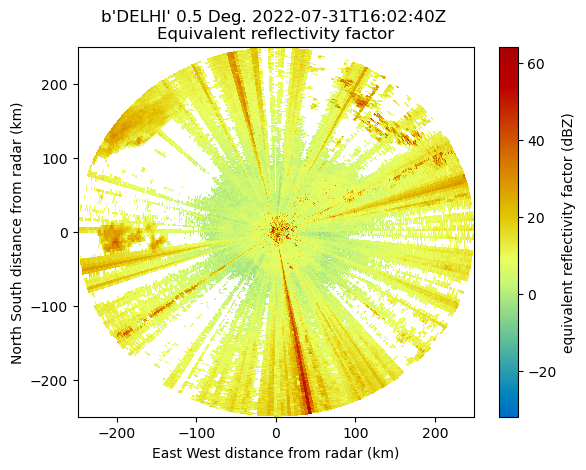

In [7]:
#MAKE A PPI PLOT FOR TOTAL REFLECTIVITY - Unfiltered Radar reflectivity factor
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure()
ax = fig.add_subplot()
display.plot_ppi('total_power', 0, vmin=-32, vmax=64.)

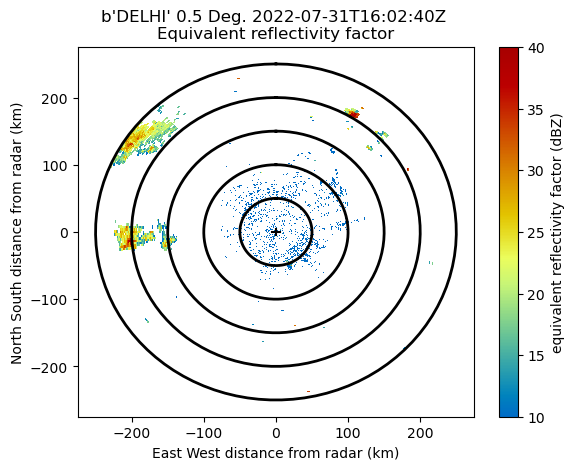

In [8]:
# Create a PPI Plot with range rings and other moments - for practise

#Plotting 
ax = fig.add_subplot()
#display.plot_ppi('reflectivity', 0, vmin=-32, vmax=64.)
display.plot_ppi('reflectivity', 0, vmin=10, vmax=40.)

display.plot_range_rings([50, 100, 150, 200,250])
display.plot_cross_hair(5.)
plt.show()

In [9]:
#DATA FILTERING - Filter all values of Radar reflectivity factor below -5dBZ
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_below('reflectivity', -5) #-5dBZ

In [10]:
#CONVERT RADAR DATA TO GRID  

#Grid Voxel values are 200 x 200 x 40 (X,Y,Z)
#That covers -250km to +250km x -250km to +250km x 0km to 20 km range around the radar
grid = pyart.map.grid_from_radars(radar, grid_shape=(41, 201, 201),
                                  grid_limits=((0.,20000,), (-250000., 250000.), (-250000, 250000.)))

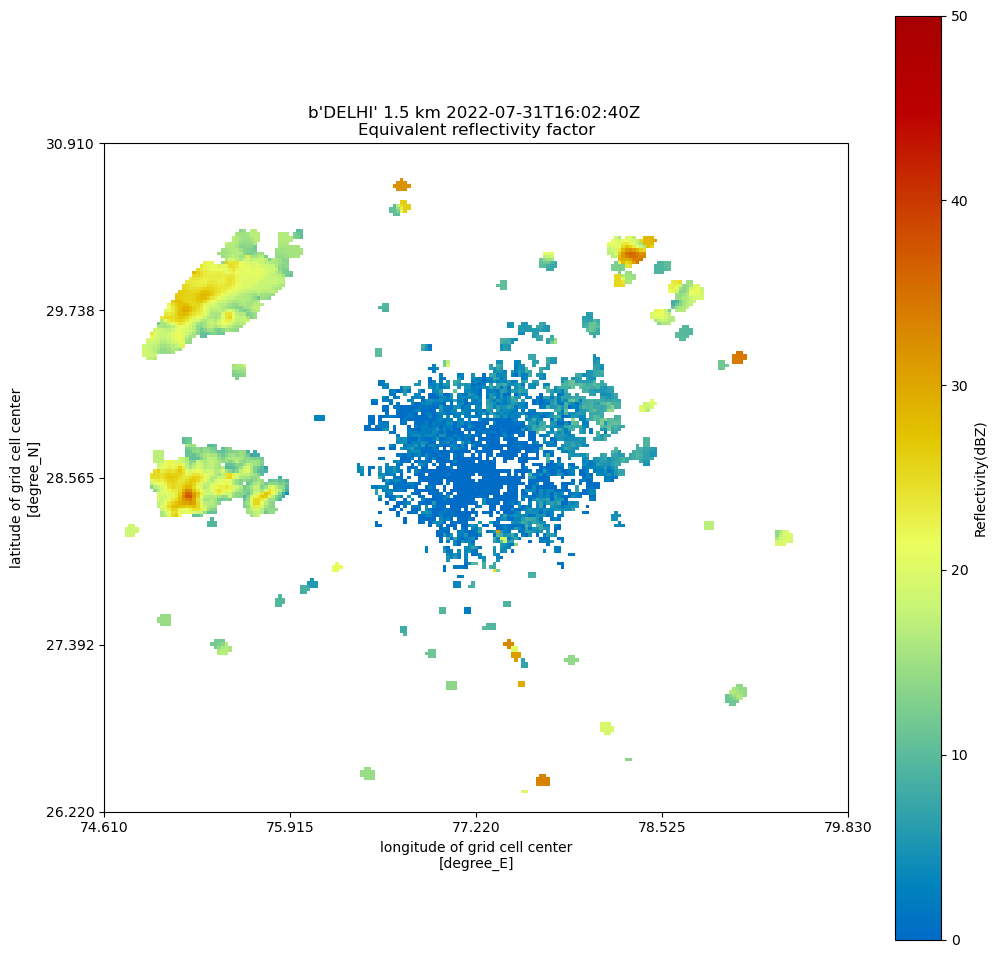

In [11]:
#PLOT THE GRID GEO-REFERRED

#create a figure dimension
fig = plt.figure(figsize=[12, 12])
#Create a display variable
display = pyart.graph.GridMapDisplay(grid, debug=False)
#Plot the reflectivity field between 0 to 50dBZ
display.plot_grid('reflectivity', level=3, vmin=0, vmax=50)

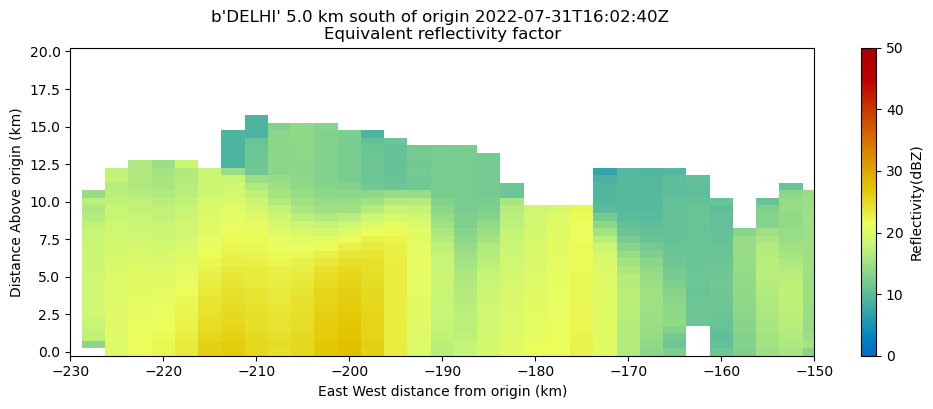

In [12]:
#CREATE CROSS-SECTION PLOT
fig = plt.figure(figsize=[12, 4])
display.plot_latitude_slice('reflectivity', lat=28.5550, vmin=0, vmax=50)
plt.xlim([-230, -150])
fig.savefig('XZ_CROSS.png')

(100.0, 250.0)

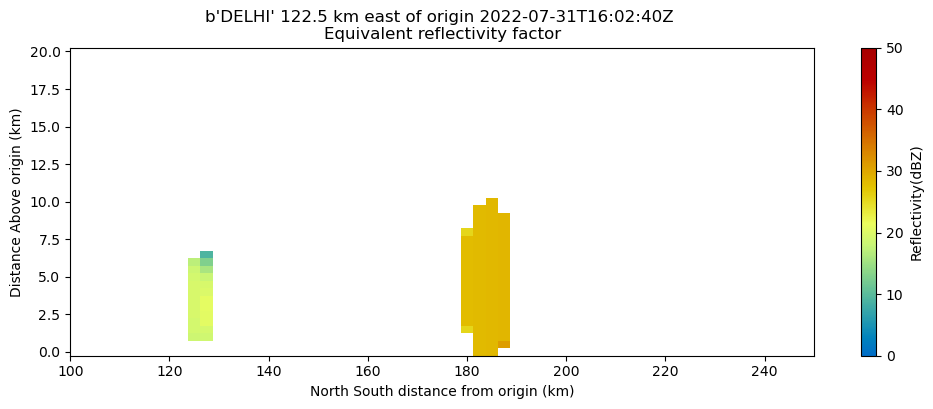

In [13]:
#CREATE CROSS-SECTION PLOT ALONG A LONGITUDE
fig = plt.figure(figsize=[12, 4])
display.plot_longitude_slice('reflectivity', lon=78.485, vmin=0, vmax=50)
plt.xlim([100, 250])


(-90.0, 10.0)

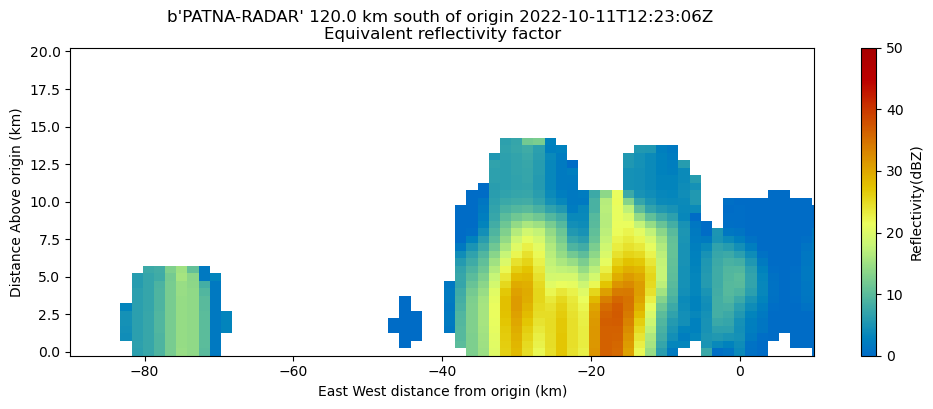

In [14]:
# ASSIGNMENT - SIMILARLY PLOT CREATED FOR PATNA RADAR
gatefilter1 = pyart.filters.GateFilter(radar2)
gatefilter1.exclude_below('reflectivity', -5)
grid = pyart.map.grid_from_radars(radar2, grid_shape=(41, 201, 201),
                                  grid_limits=((0.,20000,), (-150000., 150000.), (-150000, 150000.)))
display = pyart.graph.GridMapDisplay(grid, debug=False)
"""fig = plt.figure(figsize=[12, 12])
display.plot_grid('reflectivity', level=3, vmin=0, vmax=50)"""

fig = plt.figure(figsize=[12, 4])
#display.plot_latitude_slice('reflectivity', lat=24.260, vmin=0, vmax=50)
display.plot_latitude_slice('reflectivity', lat=24.50, vmin=0, vmax=50)

plt.xlim([-90, 10])